                                                        Energy Generation Analysis

The dataset contains numerical values for various energy generation types, forecasts, loads, and prices. The dataset consists of 35,064 entries with 29 columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Step 1: Data Cleaning
energy_data = pd.read_csv("C:/Users/DELL/Downloads/energy_dataset.csv")
# Drop columns with all NaN values
energy_data_clean = energy_data.dropna(axis=1, how='all')

# Convert 'time' to datetime
energy_data_clean['time'] = pd.to_datetime(energy_data_clean['time'], utc=True)

# Fill missing values with zero (or use interpolation for time-series if preferred)
energy_data_clean = energy_data_clean.fillna(0)

# Step 2: Summary Statistics
summary_stats = energy_data_clean.describe()
summary_stats

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\3932358016.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data_clean['time'] = pd.to_datetime(energy_data_clean['time'], utc=True)


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.0,35064.0,35064.0,35064.000000,...,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.305727,447.829198,0.0,5619.851072,4253.880903,298.158139,0.0,0.0,0.0,475.319644,...,1431.930470,269.306126,0.0,5461.674595,1439.066735,5471.216689,28712.129962,28667.476928,49.874341,57.884023
std,85.796305,354.622834,0.0,2204.946787,1963.465684,52.963429,0.0,0.0,0.0,792.269198,...,1680.002043,50.572208,0.0,3215.250084,1677.703355,3176.312853,4594.100854,4664.083855,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,237.000000,18105.000000,0.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4125.000000,2524.750000,263.000000,0.0,0.0,0.0,0.000000,...,70.000000,240.000000,0.0,2930.750000,69.000000,2979.000000,24793.750000,24800.000000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4968.000000,4473.000000,300.000000,0.0,0.0,0.0,67.000000,...,615.000000,279.000000,0.0,4847.000000,576.000000,4855.000000,28906.000000,28894.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6428.000000,5837.000000,330.000000,0.0,0.0,0.0,615.000000,...,2575.250000,310.000000,0.0,7397.000000,2636.000000,7353.000000,32263.250000,32186.250000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,4523.000000,...,5792.000000,357.000000,0.0,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [3]:
# Step 3: Missing Value Analysis
missing_values = energy_data.isnull().sum()
missing_values

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [4]:
# Aggregate energy generation data
energy_generation_cols = [col for col in energy_data_clean.columns if "generation" in col]
energy_data_clean['total_generation'] = energy_data_clean[energy_generation_cols].sum(axis=1)

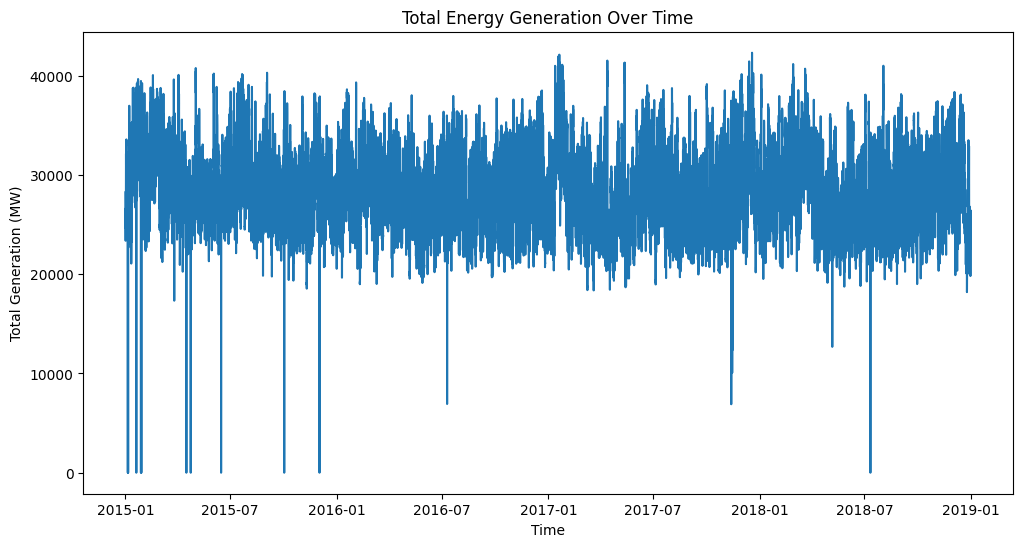

In [5]:
# Plot total energy generation over time
plt.figure(figsize=(12, 6))
plt.plot(energy_data_clean['time'], energy_data_clean['total_generation'])
plt.title("Total Energy Generation Over Time")
plt.xlabel("Time")
plt.ylabel("Total Generation (MW)")
plt.show()

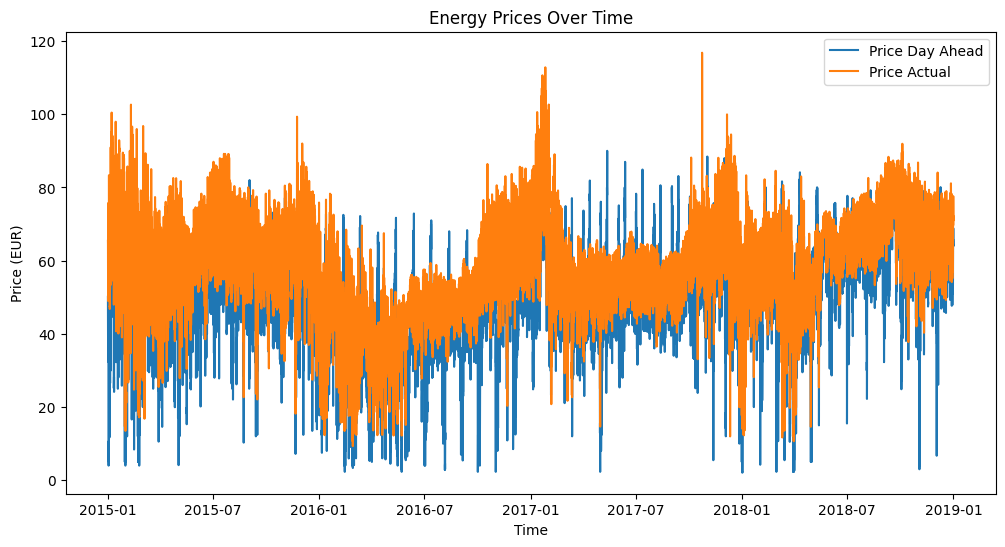

In [6]:

# Plot price trends
plt.figure(figsize=(12, 6))
plt.plot(energy_data_clean['time'], energy_data_clean['price day ahead'], label='Price Day Ahead')
plt.plot(energy_data_clean['time'], energy_data_clean['price actual'], label='Price Actual')
plt.title("Energy Prices Over Time")
plt.xlabel("Time")
plt.ylabel("Price (EUR)")
plt.legend()
plt.show()

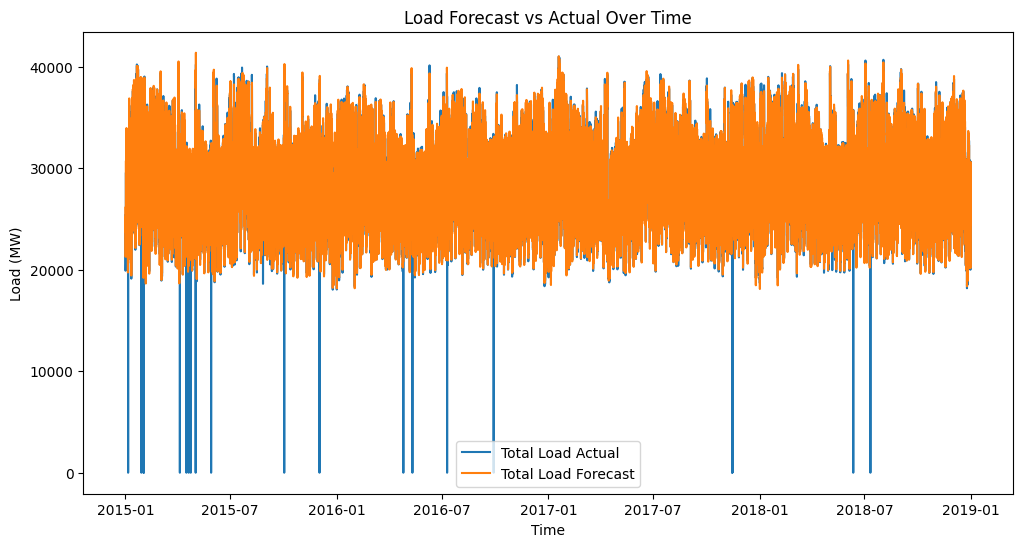

In [7]:
# Total load actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(energy_data_clean['time'], energy_data_clean['total load actual'], label='Total Load Actual')
plt.plot(energy_data_clean['time'], energy_data_clean['total load forecast'], label='Total Load Forecast')
plt.title("Load Forecast vs Actual Over Time")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()


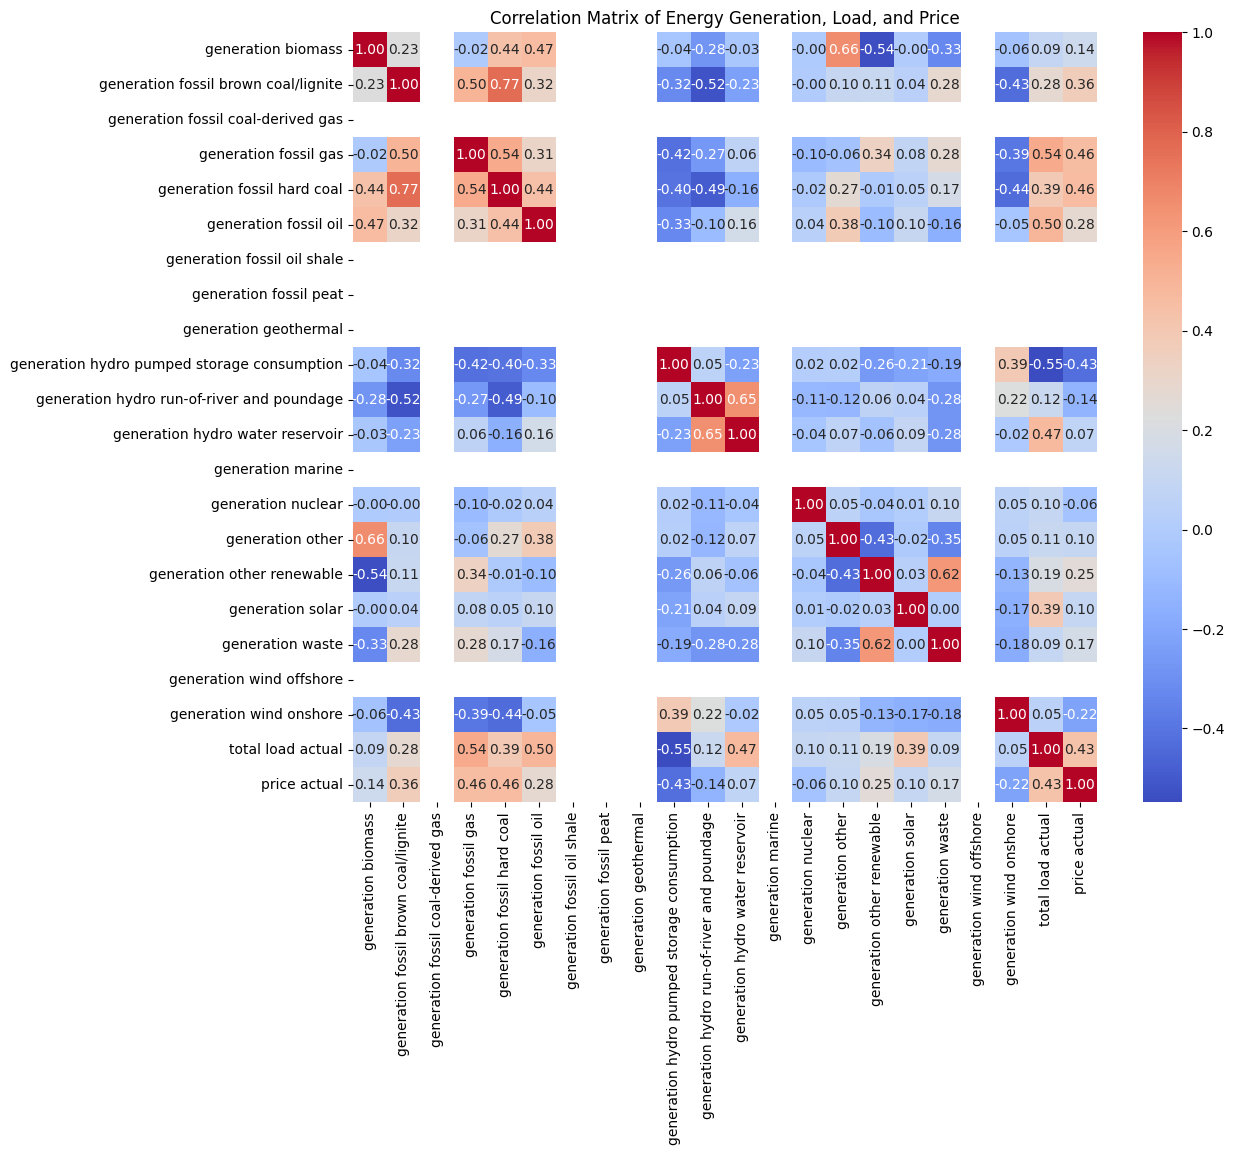

In [8]:
# Calculate correlation
correlation_matrix = energy_data_clean[energy_generation_cols + ['total load actual', 'price actual']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Energy Generation, Load, and Price")
plt.show()

From the analysis, we can infer that the Fossil gas and wind onshore are the largest contributors to total energy generation.
Renewable energy like solar shows significant variance.
There is a Positive correlation between total load, energy generation and price.

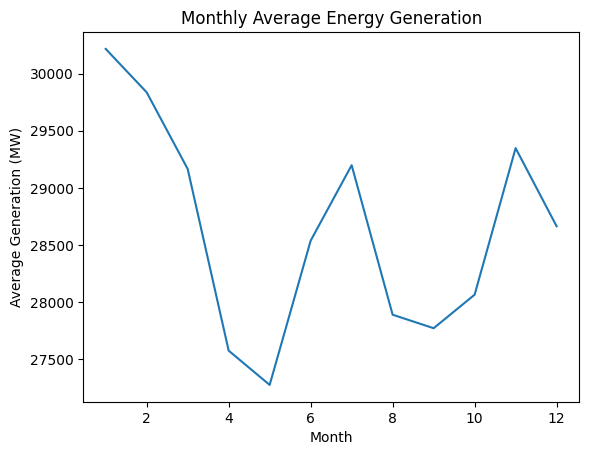

In [14]:
# Seasonal Trends in Energy Generation and Price
energy_data_clean['month'] = energy_data_clean['time'].dt.month
monthly_generation = energy_data_clean.groupby('month')['total_generation'].mean()
plt.plot(monthly_generation)
plt.title("Monthly Average Energy Generation")
plt.xlabel("Month")
plt.ylabel("Average Generation (MW)")
plt.show()


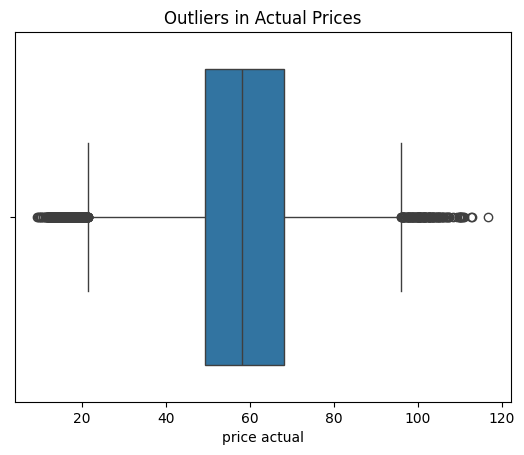

In [10]:
#Outlier Detection in Prices

sns.boxplot(x=energy_data_clean['price actual'])
plt.title("Outliers in Actual Prices")
plt.show()


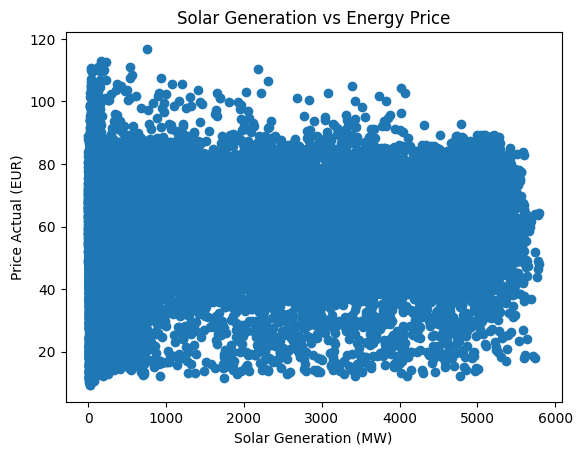

In [11]:
# Impact of Renewable Energy such as solar and wind generation on Prices
plt.scatter(energy_data_clean['generation solar'], energy_data_clean['price actual'])
plt.title("Solar Generation vs Energy Price")
plt.xlabel("Solar Generation (MW)")
plt.ylabel("Price Actual (EUR)")
plt.show()


Energy prices are influenced by demand and major energy contributors such as fossil gas, wind onshore. From the above scatter plot we can see that the increase in renewable energy generation lower energy prices.

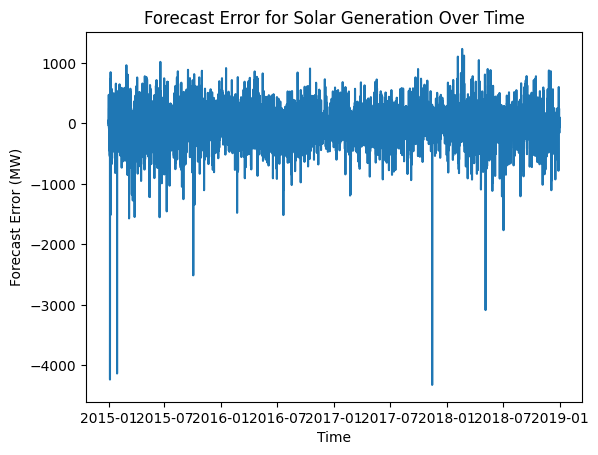

In [12]:
# Comparing the day-ahead forecasts (solar, wind onshore) with actual generation

energy_data_clean['solar_forecast_error'] = energy_data_clean['generation solar'] - energy_data_clean['forecast solar day ahead']
plt.plot(energy_data_clean['time'], energy_data_clean['solar_forecast_error'])
plt.title("Forecast Error for Solar Generation Over Time")
plt.xlabel("Time")
plt.ylabel("Forecast Error (MW)")
plt.show()


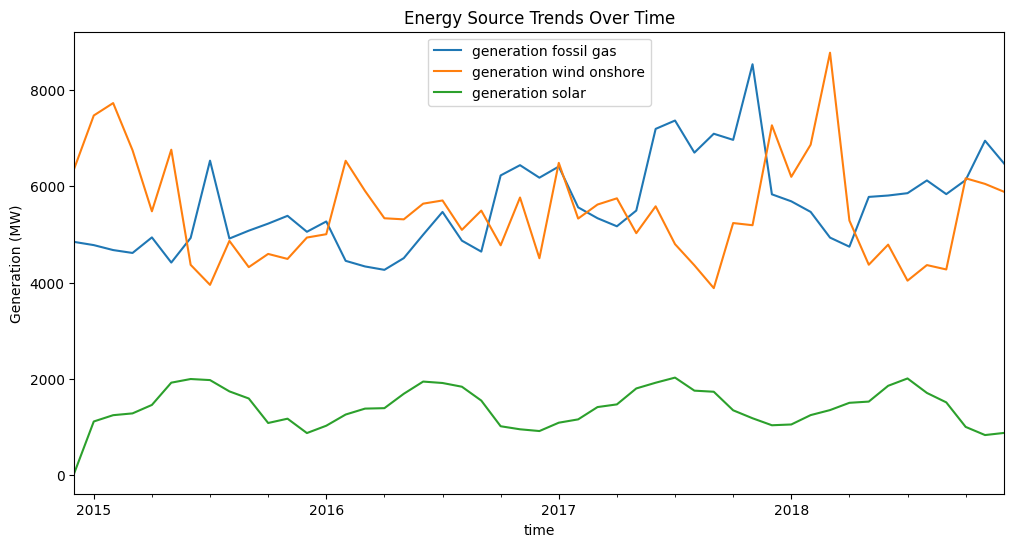

In [13]:
energy_sources = ['generation fossil gas', 'generation wind onshore', 'generation solar']
energy_data_clean.set_index('time')[energy_sources].resample('M').mean().plot(figsize=(12, 6))
plt.title("Energy Source Trends Over Time")
plt.ylabel("Generation (MW)")
plt.show()
